In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [44]:
df = pd.read_excel("/Users/thuytrangneee/Downloads/data0979_enriched.xlsx")
y = df['Total_Order_Demand']
X = df.drop(columns=['Total_Order_Demand'])
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)
x_train = x_train.select_dtypes(exclude=['datetime', 'datetimetz'])
x_test = x_test.select_dtypes(exclude=['datetime', 'datetimetz'])
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)



x train:  (1461, 7)
x test:  (366, 7)
y train:  (1461,)
y test:  (366,)


In [45]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [46]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Total_Order_Demand"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='best')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

LinearRegression() 

r_2 score : 0.8932260664254023 

CV scores: [0.90302977 0.85750299 0.8554198  0.76100961 0.83869431] 

CV scores mean: 0.8431312974106847


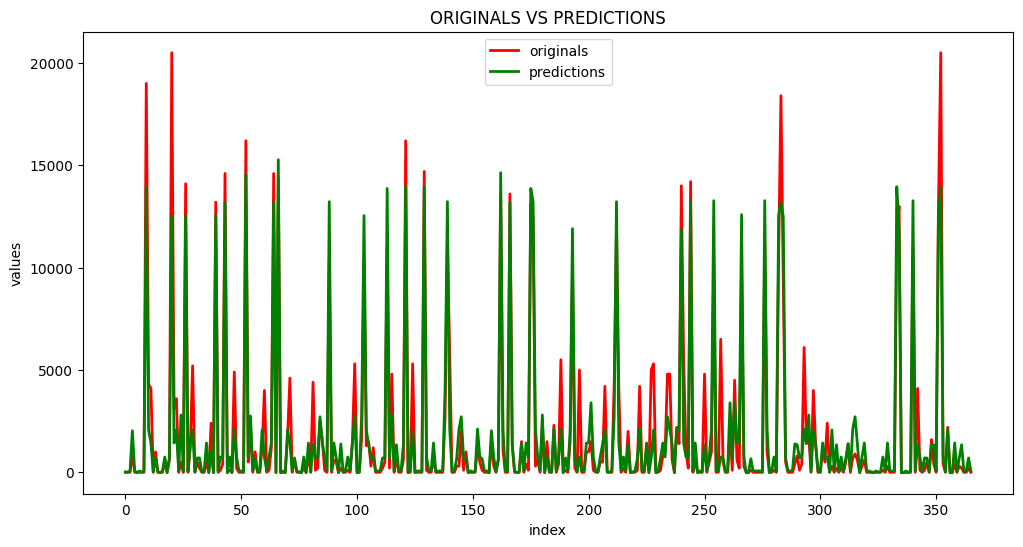

In [47]:
#linear regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test)

In [48]:
#figure out the best alpha for lasso 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.84404799461126
14.251026703029993


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=np.float64(14.251026703029993)))]) 

r_2 score : 0.8931341972082203 

CV scores: [0.90308419 0.85642848 0.85679722 0.76262188 0.83950773] 

CV scores mean: 0.8436878989806231


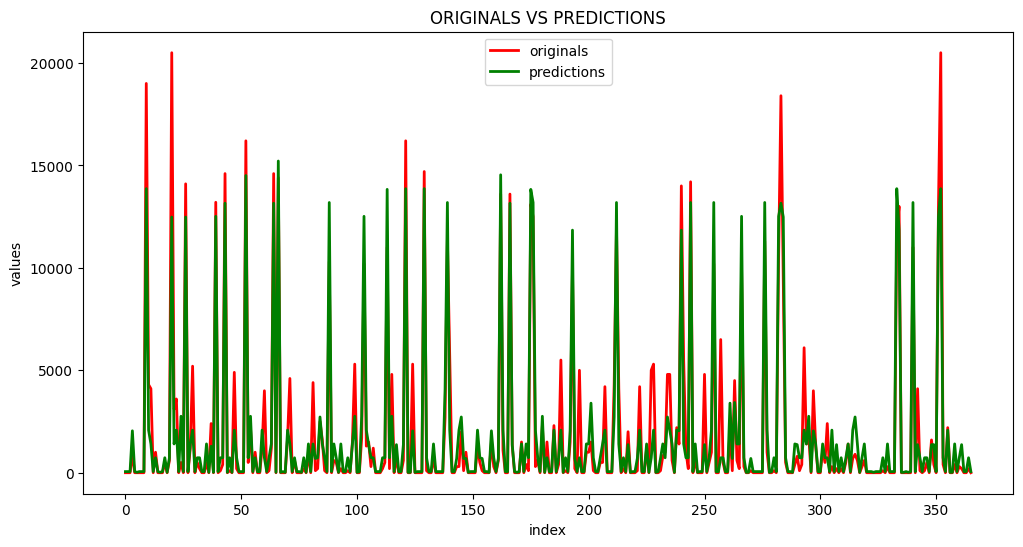

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

# Tạo pipeline với StandardScaler và Lasso
lasso = make_pipeline(StandardScaler(), Lasso(alpha=grid.best_estimator_.alpha))

# Chạy mô hình
model(lasso, x_train, y_train, x_test, y_test)



In [50]:
#find out the best alpha for Ridge 

from sklearn.linear_model import Ridge

alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(x_train, y_train)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

0.843571918631848
1.7012542798525891


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=np.float64(1.7012542798525891)))]) 

r_2 score : 0.8931996412655678 

CV scores: [0.9029008  0.85722088 0.8557408  0.76135206 0.83875207] 

CV scores mean: 0.8431933240637995


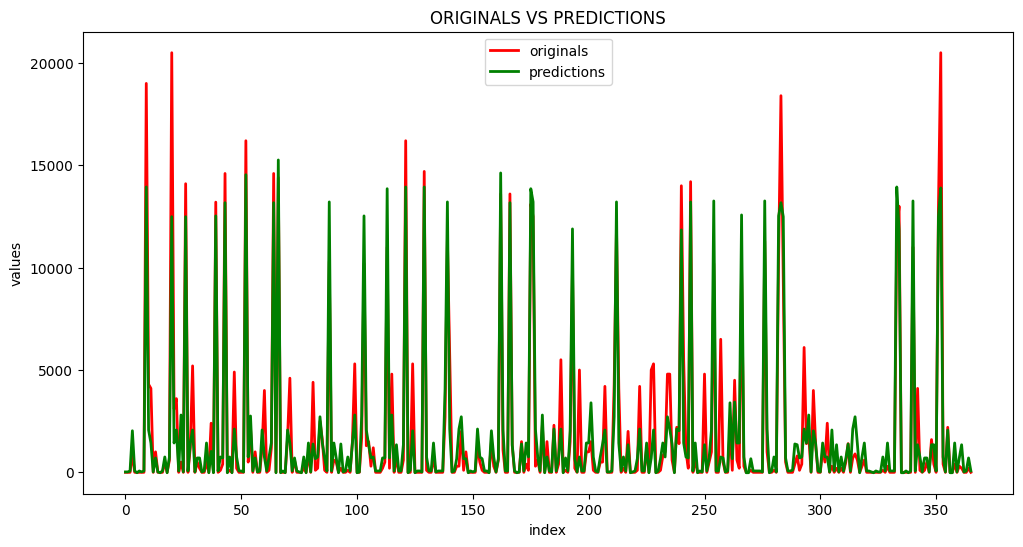

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

ridge = make_pipeline(StandardScaler(), Ridge(alpha=grid2.best_estimator_.alpha))
model(ridge, x_train, y_train, x_test, y_test)

DecisionTreeRegressor() 

r_2 score : 0.8835740562261845 

CV scores: [0.87200822 0.84728152 0.8338163  0.72757124 0.81224695] 

CV scores mean: 0.8185848465780188


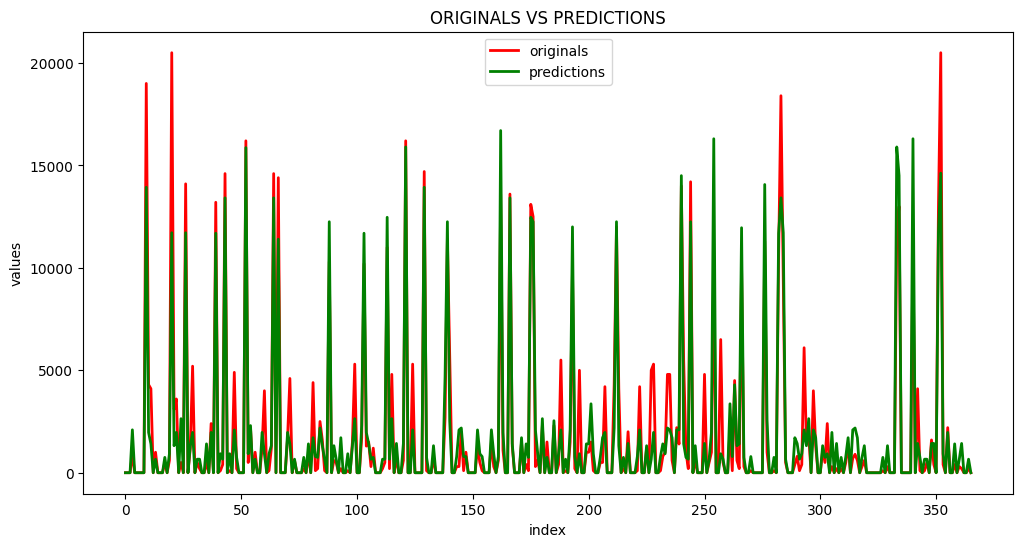

In [52]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,x_train,y_train,x_test,y_test)

RandomForestRegressor(random_state=42) 

r_2 score : 0.8848335499331546 

CV scores: [0.87894543 0.84439794 0.83404492 0.72992684 0.81438245] 

CV scores mean: 0.8203395188394964


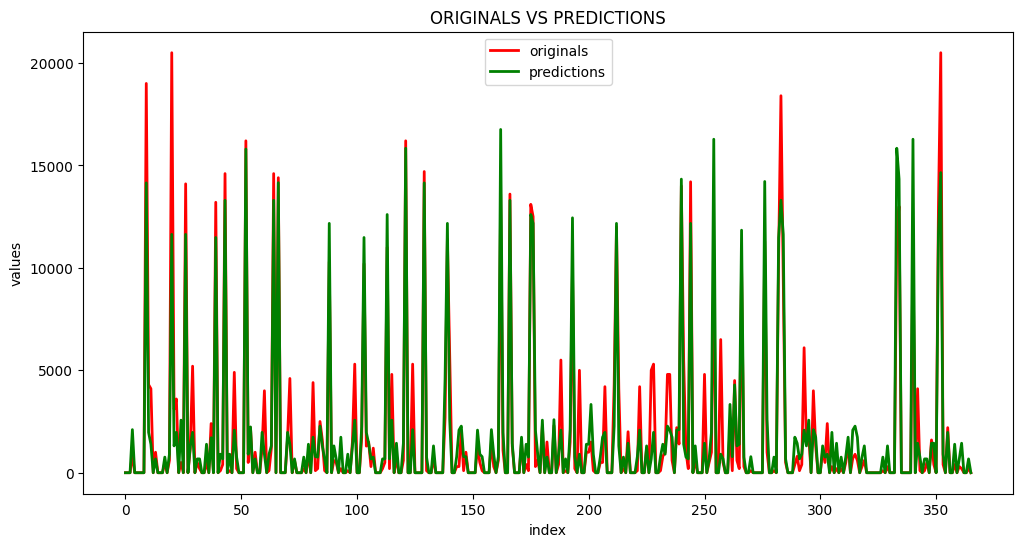

In [53]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(rf,x_train,y_train,x_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [4, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [4, 6, 8],
                                        'n_estimators': [500, 600, 700, 800,
                                                         900]}) 

r_2 score : 0.8862795030427494 

CV scores: [0.89378836 0.84171431 0.84606582 0.73134637 0.81572191] 

CV scores mean: 0.8257273538698302


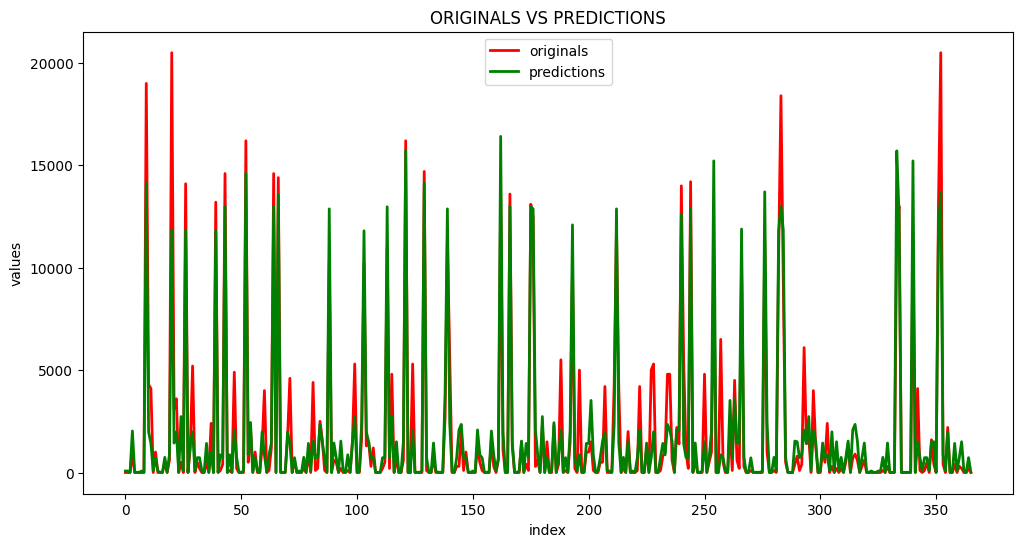

In [54]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
model(gb_rs,x_train,y_train,x_test,y_test)

In [55]:
Model = ["LinearRegression","Lasso","Ridge","DecisionTreeRegressor","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Model,'R Squared': r_2,'CV score mean': CV})
results

,Model,R Squared,CV score mean
0,LinearRegression,0.893226,0.843131
1,Lasso,0.893134,0.843688
2,Ridge,0.893200,0.843193
3,DecisionTreeRegressor,0.883574,0.818585
4,RandomForestRegressor,0.884834,0.820340
5,GradientBoostingRegressor,0.886280,0.825727
